# PyCaret Regression Model (Cubic Zirconia)

## Loading Libraries 

In [1]:
import pandas as pd
import numpy as np
import pycaret
from platform import python_version
print(f'Pycaret version: {pycaret.__version__}\nPython version: {python_version()}')

Pycaret version: 3.0.0
Python version: 3.9.16


## Loading the Data  and EDA

In [4]:
data = pd.read_csv('./Data/CubicZirconia.csv')
data.shape


(26967, 11)

In [7]:
data.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
Length_mm     float64
Width_mm      float64
Height_mm     float64
price           int64
dtype: object

In [5]:
data.isna().sum()

Unnamed: 0      0
carat           0
cut             0
color           0
clarity         0
depth         697
table           0
Length_mm       0
Width_mm        0
Height_mm       0
price           0
dtype: int64

In [9]:
dat_2 = data.dropna()
df = dat_2.drop('Unnamed: 0', axis=1)
#df.to_csv('./Data/UpdateCubicZirconia.csv', index=None)
df.head()

,carat,cut,color,clarity,depth,table,Length_mm,Width_mm,Height_mm,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


# Pycaret

In [11]:
from pycaret.regression import *

In [12]:
s = setup(data=df, target='price', session_id = 42)

,Description,Value
0,Session id,42
1,Target,price
2,Target type,Regression
3,Original data shape,"(26270, 10)"
4,Transformed data shape,"(26270, 27)"
5,Transformed train set shape,"(18389, 27)"
6,Transformed test set shape,"(7881, 27)"
7,Numeric features,6
8,Categorical features,3
9,Preprocess,True


In [13]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,297.0151,316167.8437,561.2645,0.9805,0.1117,0.0864,2.6760
catboost,CatBoost Regressor,293.0438,318002.7562,562.8732,0.9803,0.1082,0.0814,5.2640
et,Extra Trees Regressor,292.6951,340560.2392,582.8392,0.9789,0.1005,0.0737,5.6730
rf,Random Forest Regressor,295.8986,345373.8732,586.6690,0.9787,0.1001,0.0736,10.6840
xgboost,Extreme Gradient Boosting,301.3855,354924.2097,594.7509,0.9781,0.1038,0.0775,3.3510
gbr,Gradient Boosting Regressor,405.0477,550495.7270,741.3369,0.9660,0.1948,0.1266,2.7030
dt,Decision Tree Regressor,393.0448,623471.1640,788.8049,0.9614,0.1359,0.0958,5.5200
knn,K Neighbors Regressor,597.6494,1203507.5674,1095.8522,0.9256,0.2128,0.1677,5.1780
ridge,Ridge Regression,748.8923,1304388.5922,1141.4356,0.9193,0.5839,0.3962,4.3640
br,Bayesian Ridge,748.3634,1304401.2464,1141.4331,0.9193,0.5877,0.3960,5.2770


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

LGBMRegressor(random_state=42)

## Creating CatBoost and Light Gradient Boosting Machine Models

In [14]:
ctbt = create_model('catboost')
t_ctbt = tune_model(ctbt)
f_ctbt = finalize_model(t_ctbt)
f_ctbt

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,294.1813,322328.9418,567.7402,0.9792,0.1061,0.0817
1,301.1882,330727.7304,575.0893,0.9794,0.1027,0.0794
2,302.5977,336055.7702,579.7032,0.9794,0.1065,0.0809
3,284.4940,283529.9679,532.4753,0.9822,0.1067,0.0810
4,292.3728,297429.8938,545.3713,0.9819,0.1124,0.0803
5,314.1852,410043.6246,640.3465,0.9758,0.1121,0.0838
6,295.4192,335503.7135,579.2268,0.9798,0.1111,0.0829
7,292.8014,317084.3646,563.1024,0.9806,0.1141,0.0840
8,271.2596,255502.7970,505.4728,0.9837,0.1033,0.0779


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,389.7370,484979.8789,696.4050,0.9688,0.2051,0.1256
1,420.4655,533475.0736,730.3938,0.9667,0.2247,0.1341
2,418.8355,534150.4843,730.8560,0.9673,0.2035,0.1330
3,393.7644,462829.4194,680.3157,0.9709,0.2630,0.1382
4,412.7682,502177.8827,708.6451,0.9695,0.2396,0.1319
5,414.9425,598147.5028,773.4000,0.9647,0.2516,0.1313
6,408.3598,510612.4546,714.5715,0.9692,0.2671,0.1425
7,398.7959,468435.9201,684.4238,0.9714,0.3088,0.1416
8,385.7225,446544.1526,668.2396,0.9715,0.2411,0.1281


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


Pipeline(memory=FastMemory(location=C:\Users\kadee\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['carat', 'depth', 'table',
                                             'Length_mm', 'Width_mm',
                                             'Height_mm'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['cut', 'color', 'clarity'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('onehot_encoding',
                 TransformerWrapper(include=['cut', 'color', 'clarity'],
                                    transformer=OneHotEncoder(cols=['cut',
                                                                    'color',
                                                                    'clarity'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('actual_estimator',
                 <catboost.core.CatBoostRegressor object at 0x0000021241335EB0>)])

In [16]:
predict_model(t_ctbt)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,291.6917,292258.3938,540.6093,0.9820,0.1082,0.0809


,carat,cut,color,clarity,depth,table,Length_mm,Width_mm,Height_mm,price,prediction_label
15682,0.40,Ideal,J,SI1,61.400002,55.000000,4.75,4.80,2.93,612,648.754387
15259,1.26,Ideal,D,VS2,62.500000,57.000000,6.90,6.85,4.30,8256,9944.982268
21438,2.23,Premium,J,SI2,61.299999,60.000000,8.40,8.35,5.13,13931,12590.786972
26817,1.33,Premium,E,SI2,62.500000,58.000000,6.99,7.03,4.38,6963,7034.193196
22818,0.42,Ideal,G,VS2,62.200001,54.099998,4.80,4.83,3.00,907,928.963271
...,...,...,...,...,...,...,...,...,...,...,...
21441,0.54,Premium,H,SI2,61.799999,60.000000,5.20,5.16,3.20,972,1303.898829
16552,0.82,Ideal,D,SI2,62.099998,57.000000,6.04,6.00,3.74,3357,3189.038692
14746,0.41,Ideal,F,VVS2,61.200001,56.000000,4.78,4.82,2.94,1323,1210.672127
397,0.33,Premium,F,SI2,62.299999,58.000000,4.43,4.40,2.75,557,493.705382


In [17]:
lgbm = create_model('lightgbm')
t_lgbm = tune_model(lgbm)
f_lgbm = finalize_model(t_lgbm)
f_lgbm

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,291.8694,300373.9975,548.0639,0.9807,0.1103,0.0856
1,299.2512,316167.2769,562.2875,0.9803,0.1067,0.0831
2,305.7192,329694.2484,574.1901,0.9798,0.1101,0.0864
3,285.4352,283163.2572,532.1309,0.9822,0.1069,0.0838
4,293.5739,293479.7737,541.7377,0.9822,0.1095,0.0845
5,316.4892,412619.9248,642.3550,0.9756,0.1158,0.0893
6,304.9728,337841.4844,581.2413,0.9796,0.1181,0.0898
7,295.3148,318779.4579,564.6056,0.9805,0.1149,0.0871
8,281.3254,257125.0496,507.0750,0.9836,0.1113,0.0858


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,301.9638,345269.8418,587.5967,0.9778,0.1120,0.0855
1,310.9369,346244.0503,588.4251,0.9784,0.1091,0.0842
2,315.6550,344833.8429,587.2255,0.9789,0.1135,0.0883
3,287.4234,299800.4702,547.5404,0.9811,0.1094,0.0834
4,300.3207,313620.0236,560.0179,0.9810,0.1110,0.0851
5,328.8580,423879.4494,651.0603,0.9750,0.1200,0.0920
6,308.5773,355112.9939,595.9136,0.9786,0.1171,0.0891
7,307.4731,339169.2094,582.3824,0.9793,0.1186,0.0893
8,291.0909,282136.0001,531.1648,0.9820,0.1131,0.0874


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


Pipeline(memory=FastMemory(location=C:\Users\kadee\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['carat', 'depth', 'table',
                                             'Length_mm', 'Width_mm',
                                             'Height_mm'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['cut', 'color', 'clarity'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('onehot_encoding',
                 TransformerWrapper(include=['cut', 'color', 'clarity'],
                                    transformer=OneHotEncoder(cols=['cut',
                                                                    'color',
                                                                    'clarity'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('actual_estimator', LGBMRegressor(random_state=42))])

In [19]:
predict_model(t_lgbm)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,295.9751,305468.0025,552.6916,0.9812,0.1109,0.0858


,carat,cut,color,clarity,depth,table,Length_mm,Width_mm,Height_mm,price,prediction_label
15682,0.40,Ideal,J,SI1,61.400002,55.000000,4.75,4.80,2.93,612,568.443487
15259,1.26,Ideal,D,VS2,62.500000,57.000000,6.90,6.85,4.30,8256,10081.188856
21438,2.23,Premium,J,SI2,61.299999,60.000000,8.40,8.35,5.13,13931,12625.192530
26817,1.33,Premium,E,SI2,62.500000,58.000000,6.99,7.03,4.38,6963,6557.401841
22818,0.42,Ideal,G,VS2,62.200001,54.099998,4.80,4.83,3.00,907,964.277061
...,...,...,...,...,...,...,...,...,...,...,...
21441,0.54,Premium,H,SI2,61.799999,60.000000,5.20,5.16,3.20,972,1187.711261
16552,0.82,Ideal,D,SI2,62.099998,57.000000,6.04,6.00,3.74,3357,3017.977278
14746,0.41,Ideal,F,VVS2,61.200001,56.000000,4.78,4.82,2.94,1323,1160.000067
397,0.33,Premium,F,SI2,62.299999,58.000000,4.43,4.40,2.75,557,560.712705


## Plotting models 


###  Residual Plot 
As seen below there good fit for both models 

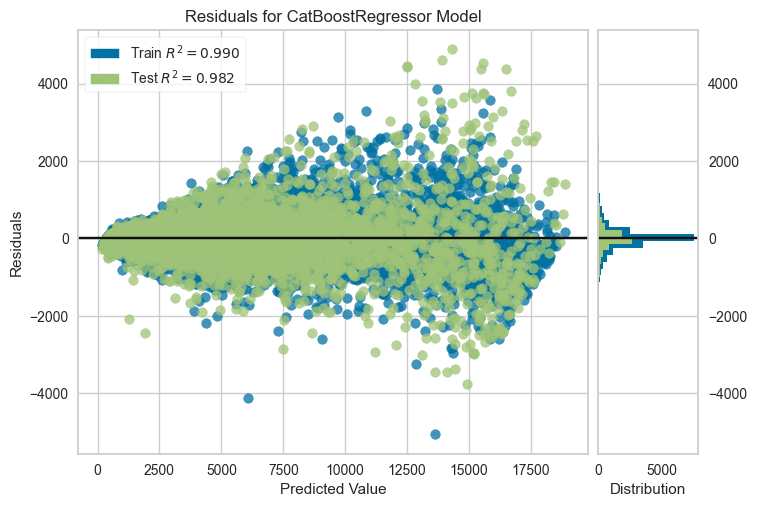

In [23]:
plot_model(t_ctbt, plot = 'residuals')

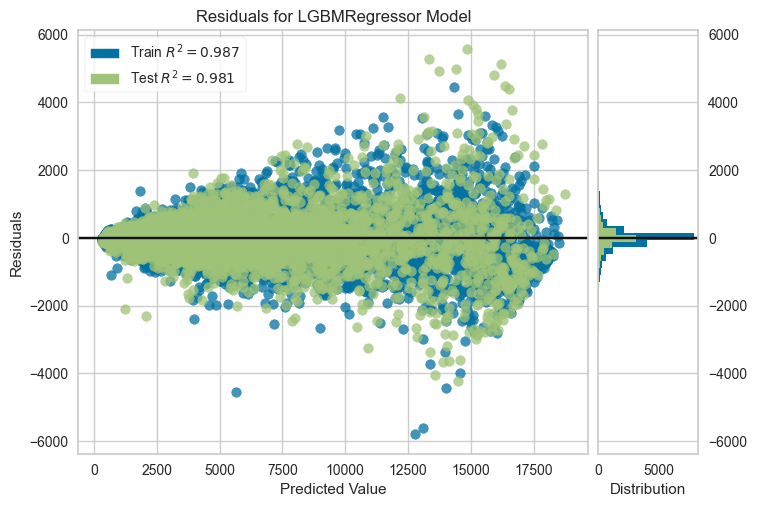

In [20]:
plot_model(t_lgbm, plot = 'residuals')

### Error
Also a the says alot about the model as both lines are in the same path on both model. This mean the choice of models was a good 

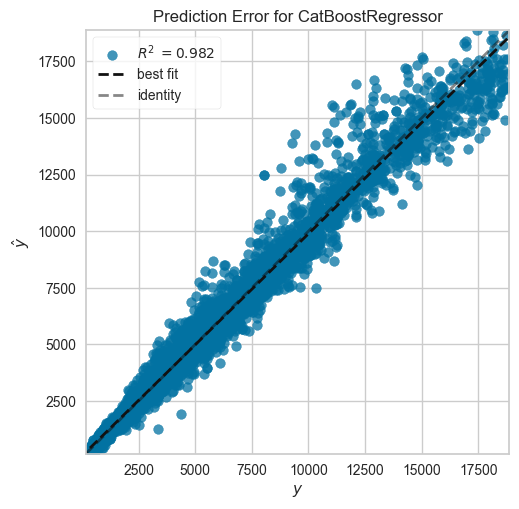

In [24]:
plot_model(t_ctbt, plot = 'error')

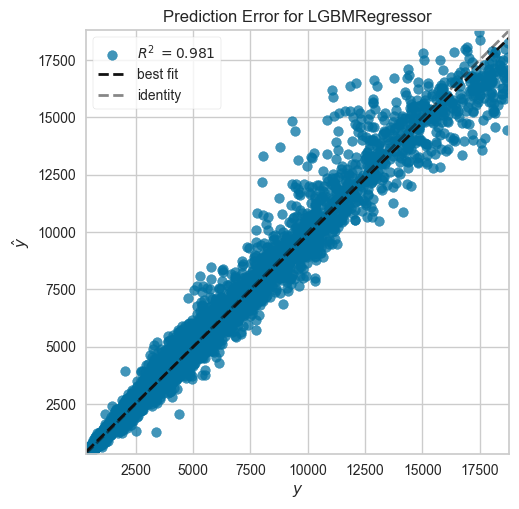

In [25]:
plot_model(t_lgbm, plot = 'error')